## Diffusion Models from Scratch

Github Source: https://github.com/huggingface/diffusion-models-class/tree/main

The command `%pip install -q diffusers` is used within a Jupyter notebook to install the `diffusers` library, a Python package developed by Hugging Face, which is commonly used for working with diffusion models like Denoising Diffusion Probabilistic Models (DDPMs).

### Breakdown of the Command:

- **`%pip install`**: This is a Jupyter notebook's magic command that allows you to run the `pip` package manager directly from a cell within the notebook. The use of `%` indicates that it is a magic command, which are special commands that alter the way a particular cell behaves in Jupyter.
  
- **`-q`**: This flag stands for "quiet". When added to the `pip install` command, it suppresses the output (like download progress bars and messages), only showing errors if they occur. This option helps in keeping the notebook cleaner and more focused on important outputs.

- **`diffusers`**: This specifies the name of the package to be installed. The `diffusers` library contains implementations of various diffusion models, providing a high-level API to easily work with these models for tasks such as image generation, image-to-image translation, and more. It is designed to be compatible with other Hugging Face libraries like `transformers`, allowing for easy integration and use of pre-trained models available in the Hugging Face Model Hub.

### Usage and Purpose:

Installing the `diffusers` library is an essential step if you are planning to demonstrate or work with diffusion models in your Python notebook. This library provides you with tools and pre-built model architectures for diffusion processes, making it much simpler to experiment with and implement these models without having to build them from scratch.

Given your context of developing code on DDPMs using the MNIST dataset, `diffusers` will provide the necessary functionalities to handle the complexities of diffusion models, letting you focus on explaining the concepts and demonstrating their applications. This could involve tasks like training a model to add noise to MNIST digits and then denoise them back to the original images, which exemplify the forward and reverse processes in diffusion models.

## Setup and Imports:

In [1]:
%pip install -q diffusers

Note: you may need to restart the kernel to use updated packages.


The code snippet below imports various Python libraries necessary for working with neural networks and diffusion models, and sets up the computing environment to utilize a GPU if available. Here's a breakdown of each component and its purpose in your DDPM tutorial using the MNIST dataset:

### Library Imports

1. **`import torch`**:
   - Imports PyTorch, a popular deep learning framework that provides a wide range of tools and functions for building and training neural networks.

2. **`import torchvision`**:
   - Imports the `torchvision` library, which is part of PyTorch and provides utilities for working with image data. It includes pre-built datasets, model architectures, and common image transformations for computer vision tasks.

3. **`from torch import nn`**:
   - Imports the neural network module (`nn`) from PyTorch, which includes all the building blocks for constructing neural networks, such as layers, activation functions, and utilities for defining custom architectures.

4. **`from torch.nn import functional as F`**:
   - Imports the functional interface of the neural network module, which provides functions that work with tensors directly and are stateless, meaning they do not hold weights themselves and instead operate on inputs and other parameters.

5. **`from torch.utils.data import DataLoader`**:
   - Imports the `DataLoader` class, which provides an iterable over a dataset. It allows for easy batching, sampling, shuffling, and multiprocess data loading.

6. **`from diffusers import DDPMScheduler, UNet2DModel`**:
   - Imports specific classes from the `diffusers` library:
     - **`DDPMScheduler`**: A class that manages the noise scheduling for a diffusion process, crucial for controlling how noise is added step-wise during the diffusion phase.
     - **`UNet2DModel`**: A specific neural network architecture that is commonly used in diffusion models, particularly adapted for processing two-dimensional data like images.

7. **`from matplotlib import pyplot as plt`**:
   - Imports the `pyplot` module from `matplotlib`, a plotting library in Python. This module is used for creating visualizations such as graphs and images, essential for displaying results like generated images or training metrics.

### Device Configuration

- **`device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`**:
  - This line configures PyTorch to use a GPU (via CUDA) if one is available; otherwise, it falls back to using the CPU. Utilizing a GPU can significantly speed up the training and inference processes in deep learning due to faster mathematical processing capabilities and parallel computation.
  - The availability of CUDA is checked with `torch.cuda.is_available()`, which returns `True` if a CUDA-compatible GPU is detected.

- **`print(f'Using device: {device}')`**:
  - Outputs which device (GPU or CPU) is being used. This is helpful for confirming that the code will run on the expected hardware, especially in environments where GPU resources are shared or limited.

### Summary

Overall, this setup script prepares the environment for developing and training diffusion models using PyTorch and the `diffusers` library. It ensures that all necessary tools are available and that the computation will be performed on the most suitable hardware, setting the stage for efficient experimentation and development of models that generate images from the MNIST dataset using DDPM. This foundational setup is crucial for any subsequent operations involving data manipulation, model training, or evaluation in your tutorial.

In [2]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


## The Data
The line of code below initializes an instance of the `MNIST` dataset from the `torchvision.datasets` module. This module is part of PyTorch's `torchvision` package, which assists in loading and transforming various well-known datasets. Let's break down each part of this command to understand its function and parameters:

### Components of the Dataset Initialization

- **`torchvision.datasets.MNIST`**: This is a class that provides access to the MNIST dataset, a widely-used dataset in machine learning, particularly for training and testing image processing systems. The MNIST dataset comprises 70,000 images of handwritten digits (0-9), commonly used for tasks like image classification.

- **`root="mnist/"`**: The `root` argument specifies the directory where the MNIST data will be stored. If the dataset is not already downloaded, it will be saved in this directory; otherwise, the dataset will be loaded from here.

- **`train=True`**: This parameter indicates whether the dataset to be loaded should be the training set (`True`) or the test set (`False`). Here, `train=True` specifies that the training data should be loaded. The training set consists of 60,000 images, while the test set contains 10,000 images.

- **`download=True`**: This flag tells the dataset loader to download the data from the internet if it's not available in the `root` directory. This is particularly useful for ensuring that the dataset is readily accessible without needing to manually download it beforehand.

- **`transform=torchvision.transforms.ToTensor()`**: The `transform` argument applies a specific transformation to each data item. `torchvision.transforms.ToTensor()` converts a PIL image or a numpy `ndarray` into a PyTorch tensor. It also automatically scales the images from 0 to 255 (the range of pixel values in grayscale images) to 0 to 1 by dividing every pixel by 255. This normalization is a common practice that helps in speeding up the convergence during training by standardizing the input data.

### Purpose and Usage

Initializing the `MNIST` dataset in this way is typically done at the beginning of a script or notebook where you plan to train or evaluate a machine learning model on this dataset. By specifying these parameters, you ensure that:
- The dataset is automatically downloaded and stored locally, which makes it easily accessible for training without requiring an internet connection after the initial download.
- The data is correctly prepared and transformed into a suitable format (PyTorch tensors) for direct use with neural network models in PyTorch.
- The normalization of pixel values aids in optimizing the learning process.

This setup is essential for training models on the MNIST dataset, allowing for straightforward integration into data loaders and training loops provided by PyTorch. The use of `ToTensor()` as a transformation ensures that the model receives inputs that are appropriately scaled and formatted, which is crucial for achieving good performance.


In [3]:
dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



The line of code below sets up a `DataLoader` for the MNIST dataset, which you initialized in the previous step. The `DataLoader` is a crucial component in PyTorch's ecosystem as it allows for efficient loading, batching, and optionally shuffling of the dataset during the training process. Here's a detailed breakdown of this command:

### Components of the DataLoader Initialization

- **`DataLoader`**: This is a class from `torch.utils.data` that abstracts the complexity of handling datasets. It provides an iterable over the given dataset that yields batches of data.

- **`dataset`**: This is the MNIST dataset instance you created earlier with `torchvision.datasets.MNIST`. It serves as the source of data that the `DataLoader` will manage.

- **`batch_size=8`**: This parameter determines how many samples (images, in this case) are included in each batch that the `DataLoader` yields. Here, each batch will consist of 8 images. The batch size is a key hyperparameter in machine learning that can affect both the speed and the stability of the training process. Smaller batch sizes generally provide a more noisy estimate of the gradient, which can help in escaping local minima, but they also mean that each epoch will take longer to run.

- **`shuffle=True`**: This flag specifies that the data should be shuffled at every epoch before batching. Shuffling helps prevent the model from learning any order-specific dependencies and generally leads to better model generalization. For the training phase, this is typically set to `True` to ensure the model encounters different sequences of the training data points across different epochs, which helps in learning robust features.

### Purpose and Usage

Setting up the `DataLoader` in this way automates several important tasks:
- **Batching**: Automatically groups multiple data items into batches. This is necessary because most neural network training procedures are performed on batches of data rather than individual data items, which makes training more efficient and can take better advantage of parallel processing capabilities.
- **Shuffling**: Randomizes the order of data items to reduce variance and ensure that models do not overfit on the order of data.
- **Loading**: Manages memory usage effectively by loading only batches of data into memory as needed, which is especially important when working with large datasets that do not fit entirely into memory.

### Summary

By using a `DataLoader`, you facilitate a smooth and efficient training loop. It ensures that each pass through the data (an epoch) efficiently processes all the data in manageable batches, with the order varied each time through shuffling if specified. This setup is particularly well-suited for training deep learning models where such practices are essential for good model performance and avoiding overfitting. This method also simplifies your training code, focusing it more on the model and training process rather than data management.

In [4]:
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

This block of code demonstrates how to interact with a `DataLoader` to extract a batch of data, examine its contents, and visualize the input images. Let’s explore each part of this snippet and its purpose in the context of training a model with the MNIST dataset:

### Extracting a Batch of Data
- **`x, y = next(iter(train_dataloader))`**:
   - **`next(iter(train_dataloader))`**: This command retrieves the next batch of data from the `train_dataloader`. Using `iter()` converts the `DataLoader` into an iterator, and `next()` fetches the first batch from this iterator. This method is particularly useful for quickly accessing a batch, for instance, when you want to check the data, perform some quick tests, or demonstrate examples without running a full training loop.
   - **`x, y`**: The batch of data typically consists of two elements: `x` and `y`, where `x` represents the input images and `y` represents the corresponding labels. In the context of MNIST, `x` would be a batch of digit images, and `y` would be the actual digit values (0-9) that each image represents.

### Inspecting Data Dimensions and Labels
- **`print('Input shape:', x.shape)`**:
   - This prints the shape of the input tensor `x`. The shape is expected to be `[batch_size, channels, height, width]`. Given that MNIST images are 28x28 pixels in grayscale, and assuming the batch size is set as 8, the shape would typically be `[8, 1, 28, 28]`.
- **`print('Labels:', y)`**:
   - This prints the labels for the batch, showing what digits each image in the batch represents. This is helpful for verification and understanding the distribution of data the model is currently working with.

### Visualizing the Input Images
- **`plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')`**:
   - **`torchvision.utils.make_grid(x)`**: This utility function from `torchvision` takes a batch of images and arranges them into a grid, making it easier to visualize multiple images at once. Since `x` is a tensor of images, `make_grid` effectively lays these images out in a grid format.
   - **`[0]`**: This indexing is necessary because `make_grid` rearranges the tensor but keeps the channel dimension (which is 1 for grayscale images) intact, so `[0]` accesses the first (and only) channel of the resulting grid tensor.
   - **`cmap='Greys'`**: This specifies the colormap for the visualization. `'Greys'` is a grayscale colormap, which is appropriate for MNIST images that do not have color information.
   - **`plt.imshow(...)`**: This function from `matplotlib.pyplot` is used to display an image (or in this case, a grid of images). It interprets the values in the tensor as pixel intensities.

### Summary
This code snippet is very useful for quickly checking the contents of a batch from your data loader, ensuring that data is being loaded correctly, and visually inspecting the inputs to the model. This can help in debugging and verifying data preprocessing and loading steps in your machine learning pipeline. By visualizing the images, you can confirm that the transformations applied (like converting to tensor and normalization) are correct and that the images are ready for model training.

Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([1, 9, 1, 9, 5, 9, 6, 9])


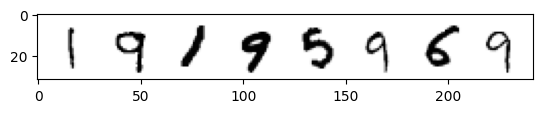

In [5]:
x, y = next(iter(train_dataloader))
print('Input shape:', x.shape)
print('Labels:', y)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys');

Each image is a greyscale 28px by 28px drawing of a digit, with values ranging from 0 to 1.

## The Corruption Process

Pretend you haven't read any diffusion model papers, but you know the process involves adding noise. How would you do it?

We probably want an easy way to control the amount of corruption. So what if we take in a parameter for the `amount` of noise to add, and then we do:

`noise = torch.rand_like(x)` 

`noisy_x =  (1-amount)*x + amount*noise`

If amount = 0, we get back the input without any changes. If amount gets up to 1, we get back noise with no trace of the input x. By mixing the input with noise this way, we keep the output in the same range (0 to 1).

We can implement this fairly easily (just watch the shapes so you don't get burnt by broadcasting rules): 

## Code Explaination

The function `corrupt(x, amount)` is designed to simulate the diffusion process typically used in diffusion models, such as Denoising Diffusion Probabilistic Models (DDPMs). It introduces noise into the input image `x` by blending it with random noise generated in the function. This type of function is crucial in the forward pass of a diffusion model where you gradually add noise to an image over a series of steps. Let’s break down the function:

### Function Details

- **`def corrupt(x, amount):`**
  - **Parameters**:
    - **`x`**: This parameter represents the input tensor (image or batch of images). In the context of diffusion models, `x` typically starts as clean data (e.g., a set of images).
    - **`amount`**: A tensor specifying how much noise to add to each image. It determines the proportion of noise mixed with the original data. This is typically a function of the timestep in diffusion models, where the noise level increases as the timestep progresses.

### Process Explained

1. **Generating Noise**:
   - **`noise = torch.rand_like(x)`**: This line creates a tensor of random values that has the same shape as the input tensor `x`. The `torch.rand_like` function generates random numbers from a uniform distribution between 0 and 1 for each element in the tensor.

2. **Adjusting the `amount` Shape for Broadcasting**:
   - **`amount = amount.view(-1, 1, 1, 1)`**: This line reshapes the `amount` tensor so that it can be correctly broadcasted when combined with `x` and `noise`. The `view(-1, 1, 1, 1)` ensures that `amount` retains its batch dimension (if any) and adds singleton dimensions for channels, height, and width, allowing the same noise level to be applied across each entire image uniformly.

3. **Corrupting the Image**:
   - **`return x*(1-amount) + noise*amount`**:
     - **`x*(1-amount)`**: This computes the portion of the original image to retain. As `amount` increases, less of the original image is kept.
     - **`noise*amount`**: This calculates how much noise to add. As `amount` increases, more noise influences the resulting image.
     - The final output is a linear combination of the original image and the noise, governed by the `amount` tensor. When `amount` is close to 0, the output will be very close to the original `x`. As `amount` approaches 1, the output increasingly resembles the noise.

### Purpose in a Diffusion Model

In DDPMs and other diffusion models, this type of function simulates the forward diffusion process, where you start with a data distribution (e.g., a dataset of images) and gradually add noise over several steps until the data is completely (or nearly completely) converted into noise. This function helps create the noisy data at each timestep, which is then used by the model to learn the reverse process: denoising the data step-by-step to reconstruct the original data from noise.

### Summary

This `corrupt` function is a core component in training and simulating diffusion models, allowing for the controlled addition of noise to input data, which is a fundamental aspect of the diffusion process in models like DDPMs. The method of introducing noise and controlling its amount is essential for these models to learn the intricate transitions between data and noise, which underpins their ability to generate new data samples.

In [6]:
def corrupt(x, amount):
  """Corrupt the input `x` by mixing it with noise according to `amount`"""
  noise = torch.rand_like(x)
  amount = amount.view(-1, 1, 1, 1) # Sort shape so broadcasting works
  return x*(1-amount) + noise*amount 

This code block plots the input data (images) and their corresponding corrupted versions by adding noise. Let's go through each part of the code and understand its functionality:

### Plotting the Input Data
- **`fig, axs = plt.subplots(2, 1, figsize=(12, 5))`**: This line creates a figure with 2 subplots arranged in a 2x1 grid. `fig` is the entire figure, and `axs` is an array of Axes objects representing each subplot.
- **`axs[0].set_title('Input data')`**: This sets the title for the first subplot, indicating that it will display the original input data.
- **`axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')`**: This line displays the original input data (`x`) in the first subplot. It uses `torchvision.utils.make_grid(x)` to create a grid of images for visualization and selects the first (and only) channel `[0]`. The colormap `'Greys'` indicates that grayscale visualization should be used.

### Adding Noise
- **`amount = torch.linspace(0, 1, x.shape[0])`**: This line generates a linearly spaced tensor (`amount`) ranging from 0 to 1, with `x.shape[0]` elements. This tensor represents the amount of corruption to apply to each image, with increasing corruption from left to right.
- **`noised_x = corrupt(x, amount)`**: This calls the `corrupt` function to apply noise to the input data `x`. The `amount` tensor controls the level of corruption for each image in `x`.

### Plotting the Noised Version
- **`axs[1].set_title('Corrupted data (-- amount increases -->)')`**: This sets the title for the second subplot, indicating that it will display the corrupted (noised) data.
- **`axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap='Greys')`**: This line displays the corrupted data (`noised_x`) in the second subplot. Similar to the first subplot, it uses `torchvision.utils.make_grid` to create a grid of images for visualization and selects the first channel `[0]`. The colormap `'Greys'` indicates grayscale visualization.

### Summary
This code block provides a visual comparison between the original input data and their corrupted versions with increasing levels of noise. It demonstrates how the `corrupt` function can be used to simulate the diffusion process, gradually corrupting the input data to produce a range of noisy samples. Visualizing the corrupted data helps in understanding how the noise affects the appearance of the images and provides insights into the behavior of the diffusion model during training.

And looking at the results visually to see that it works as expected:

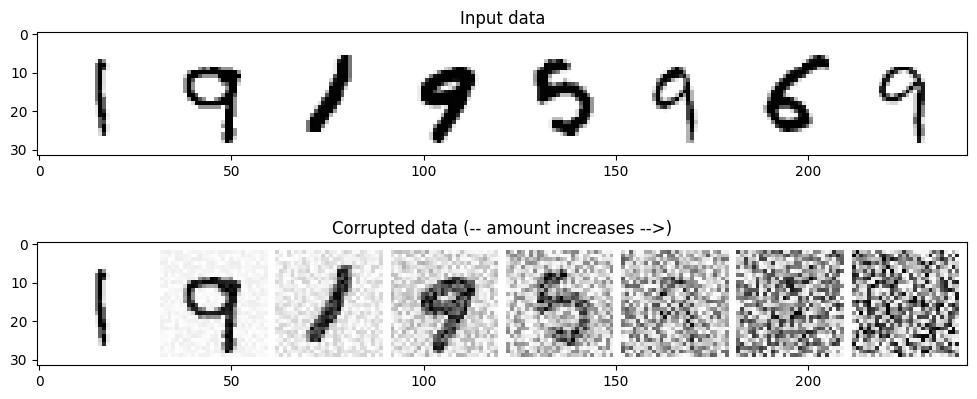

In [7]:
# Plotting the input data
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')

# Adding noise
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Plotting the noised version
axs[1].set_title('Corrupted data (-- amount increases -->)')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap='Greys');

As noise amount approaches one, our data begins to look like pure random noise. But for most noise amounts, you can guess the digit fairly well. Do you think this is optimal?

## The Model

We'd like a model that takes in a 28px noisy images and outputs a prediction of the same shape. A popular choice here is an architecture called a UNet. [Originally invented for segmentation tasks in medical imagery](https://arxiv.org/abs/1505.04597), a UNet consists of a 'constricting path' through which data is compressed down and an 'expanding path' through which it expands back up to the original dimension (similar to an autoencoder) but also features skip connections that allow for information and gradients to flow across at different levels. 

Some UNets feature complex blocks at each stage, but for this toy demo we'll build a minimal example that takes in a one-channel image and passes it through three convolutional layers on the down path (the down_layers in the diagram and code) and three on the up path, with skip connections between the down and up layers. We'll use max pooling for downsampling and `nn.Upsample` for upsampling rather than relying on learnable layers like more complex UNets. Here is the rough architecture showing the number of channels in the output of each layer:

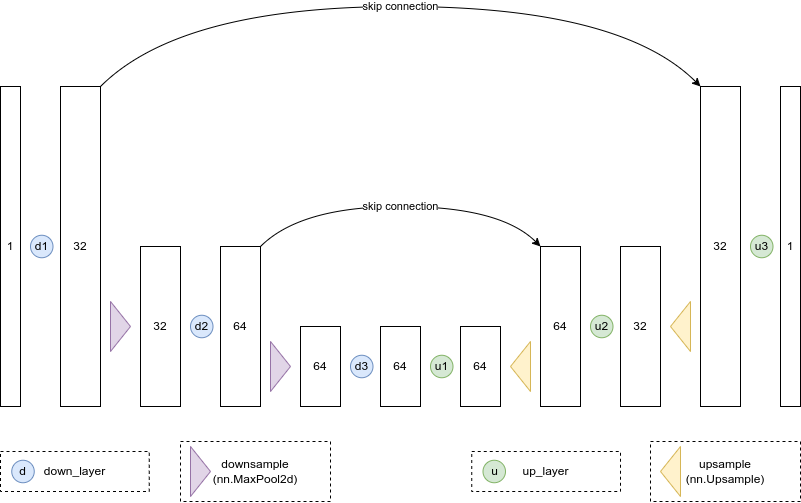

## Code Explaination
This code defines a basic implementation of a UNet architecture, a popular convolutional neural network (CNN) architecture commonly used in image segmentation tasks. Here's a breakdown of the code:

### Class Definition
- **`class BasicUNet(nn.Module):`**: This declares a class named `BasicUNet`, which inherits from `nn.Module`, the base class for all neural network modules in PyTorch.

### Constructor
- **`def __init__(self, in_channels=1, out_channels=1):`**: This method initializes the `BasicUNet` class. It defines the architecture of the UNet model.
  - **`in_channels=1, out_channels=1`**: These parameters specify the number of input and output channels, with default values set to 1, indicating grayscale images.
  - **`self.down_layers`**: This is a list of convolutional layers for the downsampling (contracting) path of the UNet.
  - **`self.up_layers`**: This is a list of convolutional layers for the upsampling (expansive) path of the UNet.
  - **`self.act = nn.SiLU()`**: This sets the activation function to SiLU (Sigmoid Linear Unit), which is a smoothed version of the ReLU activation function.
  - **`self.downscale = nn.MaxPool2d(2)`**: This defines a max-pooling layer with a kernel size of 2x2 for downsampling.
  - **`self.upscale = nn.Upsample(scale_factor=2)`**: This defines an upsampling layer with a scale factor of 2 for upsampling.

### Forward Method
- **`def forward(self, x):`**: This method defines the forward pass computation of the UNet model.
  - **`h = []`**: This initializes an empty list to store intermediate outputs for skip connections.
  - **Downsampling Path**:
    - **`for i, l in enumerate(self.down_layers):`**: This loop iterates over the downsampling layers.
      - **`x = self.act(l(x))`**: It applies the current convolutional layer followed by the activation function to the input `x`.
      - **`if i < 2:`**: For the first two downsampling layers:
        - **`h.append(x)`**: It stores the output of the current layer in the list `h` for skip connections.
        - **`x = self.downscale(x)`**: It downsamples the feature map using max-pooling for the next layer.
  - **Upsampling Path**:
    - **`for i, l in enumerate(self.up_layers):`**: This loop iterates over the upsampling layers.
      - **`if i > 0:`**: For all but the first upsampling layer:
        - **`x = self.upscale(x)`**: It upsamples the feature map.
        - **`x += h.pop()`**: It adds the corresponding output from the downsampling path (skip connection).
      - **`x = self.act(l(x))`**: It applies the current convolutional layer followed by the activation function to the input `x`.
  - **`return x`**: The final output of the model.

### Summary
This code implements a simplified version of the UNet architecture, which consists of a contracting (downsampling) path followed by an expanding (upsampling) path. It utilizes skip connections to preserve spatial information during the downsampling process and improve the performance of the segmentation task. The UNet architecture is widely used in various medical image segmentation tasks and other image-to-image translation tasks.

This is what that looks like in code:

In [8]:
class BasicUNet(nn.Module):
    """A minimal UNet implementation."""
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.down_layers = torch.nn.ModuleList([ 
            nn.Conv2d(in_channels, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
        ])
        self.up_layers = torch.nn.ModuleList([
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, out_channels, kernel_size=5, padding=2), 
        ])
        self.act = nn.SiLU() # The activation function
        self.downscale = nn.MaxPool2d(2)
        self.upscale = nn.Upsample(scale_factor=2)

    def forward(self, x):
        h = []
        for i, l in enumerate(self.down_layers):
            x = self.act(l(x)) # Through the layer and the activation function
            if i < 2: # For all but the third (final) down layer:
              h.append(x) # Storing output for skip connection
              x = self.downscale(x) # Downscale ready for the next layer
              
        for i, l in enumerate(self.up_layers):
            if i > 0: # For all except the first up layer
              x = self.upscale(x) # Upscale
              x += h.pop() # Fetching stored output (skip connection)
            x = self.act(l(x)) # Through the layer and the activation function
            
        return x

## Code Explaination
In this code snippet, an instance of the `BasicUNet` class is created, and a random tensor `x` is generated. Then, `x` is passed through the UNet model (`net`) to obtain the shape of the output tensor. Let's break down the code:

1. **Instantiate the UNet Model**:
   - **`net = BasicUNet()`**: This line creates an instance of the `BasicUNet` class, initializing it with default parameters.

2. **Generate Random Input Tensor**:
   - **`x = torch.rand(8, 1, 28, 28)`**: This line creates a random tensor `x` with a shape of `(8, 1, 28, 28)`. 
     - `8` represents the batch size.
     - `1` indicates a single channel (grayscale image).
     - `28x28` represents the height and width of each image.

3. **Pass Input Through the Model**:
   - **`net(x)`**: This line passes the input tensor `x` through the UNet model (`net`).
   - **`.shape`**: This retrieves the shape of the output tensor returned by the model.

4. **Output Shape**:
   - The shape of the output tensor represents the dimensions of the processed input tensor after passing through the UNet model.
   - It provides insights into the spatial dimensions and the number of channels of the output feature map.

### Summary:
This code snippet demonstrates the process of using the `BasicUNet` model to process a batch of random input data (`x`). By inspecting the shape of the output tensor, you can understand how the UNet architecture transforms the input data. This is crucial for verifying that the model behaves as expected and for understanding the compatibility of subsequent layers or modules in the neural network architecture.

We can verify that the output shape is the same as the input, as we expect:

In [9]:
net = BasicUNet()
x = torch.rand(8, 1, 28, 28)
net(x).shape

torch.Size([8, 1, 28, 28])

This network has just over 300,000 parameters:

This code calculates the total number of parameters in the `BasicUNet` model (`net`). Let's break down the code:

1. **List Comprehension**:
   - **`[p.numel() for p in net.parameters()]`**: This is a list comprehension that iterates over all parameters (`p`) in the `net` model and calculates the number of elements in each parameter tensor using the `.numel()` method. Each parameter tensor represents a learnable parameter in the neural network, such as weights or biases.

2. **Summation**:
   - **`sum(...)`**: This function computes the sum of all elements in the list generated by the list comprehension.
   
3. **Total Number of Parameters**:
   - The result of the summation represents the total number of parameters in the model, which includes both trainable and non-trainable parameters. 
   - This count is often used as a metric to evaluate the complexity of a neural network model. It indicates the capacity of the model to learn from the data and is important for assessing model size, memory requirements, and computational efficiency.

### Summary:
This code snippet provides a simple and efficient way to calculate the total number of parameters in the `BasicUNet` model. Understanding the number of parameters in a neural network model is essential for model optimization, memory management, and performance evaluation.

In [10]:
sum([p.numel() for p in net.parameters()])

309057

You can explore changing the number of channels in each layer or swapping in different architectures if you want.

## Training the network

So what should the model do, exactly? Again, there are various takes on this but for this demo let's pick a simple framing: given a corrupted input noisy_x the model should output its best guess for what the original x looks like. We will compare this to the actual value via the mean squared error.

We can now have a go at training the network. 
- Get a batch of data
- Corrupt it by random amounts
- Feed it through the model
- Compare the model predictions with the clean images to calculate our loss
- Update the model's parameters accordingly.

Feel free to modify this and see if you can get it working better!

## Code Explaination
This code segment implements the training loop for a neural network using a dataset loaded through a PyTorch DataLoader. Let's dissect it step by step:

1. **Data Loader Setup**:
   - **`batch_size = 128`**: Defines the batch size for the DataLoader, indicating how many samples are processed in each iteration.
   - **`train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)`**: Creates a DataLoader instance for the training dataset (`dataset`) with the specified batch size. It shuffles the data during training (`shuffle=True`), ensuring that the model sees the data in random order in each epoch.

2. **Training Parameters**:
   - **`n_epochs = 3`**: Specifies the number of epochs, i.e., the number of times the entire dataset is processed during training.
   
3. **Model Initialization**:
   - **`net = BasicUNet()`**: Instantiates the neural network model (`BasicUNet`).
   - **`net.to(device)`**: Moves the model to the specified device (GPU if available, otherwise CPU).
   
4. **Loss Function and Optimizer**:
   - **`loss_fn = nn.MSELoss()`**: Defines the loss function. Here, Mean Squared Error (MSE) loss is used, which measures the average squared difference between the predicted and target values.
   - **`opt = torch.optim.Adam(net.parameters(), lr=1e-3)`**: Initializes the Adam optimizer, which updates the model parameters based on the computed gradients during backpropagation. It optimizes the parameters of the `net` model with a learning rate of `1e-3`.

5. **Training Loop**:
   - **Outer Loop (`for epoch in range(n_epochs):`)**: Iterates over the specified number of epochs.
   - **Inner Loop (`for x, y in train_dataloader:`)**: Iterates over each batch of data from the DataLoader.
     - **Data Preparation**: 
       - **`x = x.to(device)`**: Moves the input data tensor to the specified device (GPU or CPU).
       - **`noise_amount = torch.rand(x.shape[0]).to(device)`**: Generates random noise amounts for each sample in the batch and moves them to the device.
       - **`noisy_x = corrupt(x, noise_amount)`**: Creates a corrupted version of the input data (`x`) by adding random noise.
     - **Forward Pass**:
       - **`pred = net(noisy_x)`**: Performs a forward pass through the neural network to obtain predictions.
     - **Loss Calculation and Backpropagation**:
       - **`loss = loss_fn(pred, x)`**: Computes the loss between the predicted and clean input data.
       - **`opt.zero_grad()`**: Clears the gradients of all optimized tensors.
       - **`loss.backward()`**: Computes gradients of the loss with respect to the model parameters.
       - **`opt.step()`**: Updates the model parameters based on the gradients computed during backpropagation.
     - **Logging**:
       - **`losses.append(loss.item())`**: Appends the current loss value to the `losses` list for later analysis.
   - **Epoch Summary**:
     - **`avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)`**: Computes the average loss for the current epoch using the losses accumulated during the epoch.
     - **`print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')`**: Prints the epoch number and the average loss for the epoch.

6. **Loss Curve Visualization**:
   - **`plt.plot(losses)`**: Plots the evolution of the loss values over the training process.
   - **`plt.ylim(0, 0.1)`**: Sets the y-axis limits of the plot to better visualize the loss values.

### Summary:
This code trains a neural network model (`BasicUNet`) using a DataLoader with the MNIST dataset. It demonstrates the typical structure of a training loop in PyTorch, including data loading, model initialization, loss computation, backpropagation, parameter optimization, and logging. The loss curve visualization helps monitor the training progress and assess the convergence of the model.

Finished epoch 0. Average loss for this epoch: 0.025997
Finished epoch 1. Average loss for this epoch: 0.019678
Finished epoch 2. Average loss for this epoch: 0.018229


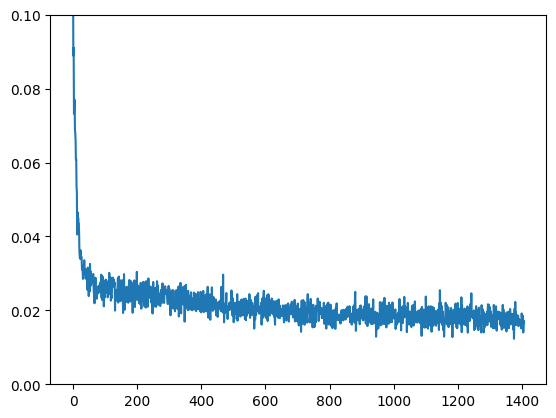

In [11]:
# Dataloader (you can mess with batch size)
batch_size = 128
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# How many runs through the data should we do?
n_epochs = 3

# Create the network
net = BasicUNet()
net.to(device)

# Our loss function
loss_fn = nn.MSELoss()

# The optimizer
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 

# Keeping a record of the losses for later viewing
losses = []

# The training loop
for epoch in range(n_epochs):

    for x, y in train_dataloader:

        # Get some data and prepare the corrupted version
        x = x.to(device) # Data on the GPU
        noise_amount = torch.rand(x.shape[0]).to(device) # Pick random noise amounts
        noisy_x = corrupt(x, noise_amount) # Create our noisy x

        # Get the model prediction
        pred = net(noisy_x)

        # Calculate the loss
        loss = loss_fn(pred, x) # How close is the output to the true 'clean' x?

        # Backprop and update the params:
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)
    print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

# View the loss curve
plt.plot(losses)
plt.ylim(0, 0.1);

## Code Explaination
This code snippet visualizes the model predictions on noisy inputs. Let's break down the steps:

1. **Data Preparation**:
   - **`x, y = next(iter(train_dataloader))`**: Retrieves a batch of data (`x`) and corresponding labels (`y`) from the training dataloader.
   - **`x = x[:8]`**: Selects the first 8 samples from the batch for visualization.

2. **Corrupting Input Data**:
   - **`amount = torch.linspace(0, 1, x.shape[0])`**: Generates a range of corruption amounts from 0 to 1 for each sample in the batch.
   - **`noised_x = corrupt(x, amount)`**: Applies corruption to the input data (`x`) using the `corrupt` function defined earlier.

3. **Model Prediction**:
   - **`with torch.no_grad():`**: Temporarily sets all `requires_grad` flags to `False` within this block to disable gradient tracking, as we are only interested in inference, not training.
   - **`preds = net(noised_x.to(device)).detach().cpu()`**: Passes the corrupted input data (`noised_x`) through the model (`net`) to obtain predictions (`preds`). `.detach().cpu()` detaches the output tensor from the computation graph and moves it to the CPU.

4. **Plotting**:
   - **`fig, axs = plt.subplots(3, 1, figsize=(12, 7))`**: Creates a figure with three subplots for visualization.
   - **`axs[0].imshow(...)`**: Displays the original input data (`x`) in the first subplot.
   - **`axs[1].imshow(...)`**: Displays the corrupted input data (`noised_x`) in the second subplot.
   - **`axs[2].imshow(...)`**: Displays the model predictions (`preds`) in the third subplot.
   - **`.clip(0, 1)`**: Clips the pixel values to the range [0, 1] to ensure valid image visualization.
   - **`cmap='Greys'`**: Specifies the colormap to use for grayscale visualization.

### Summary:
This code snippet demonstrates how to visualize the model's behavior on noisy inputs. It shows the original input data, the corrupted data, and the model predictions. Visualizing model outputs can provide insights into the model's performance and behavior, helping to assess its effectiveness in handling noisy inputs.

We can try to see what the model predictions look like by grabbing a batch of data, corrupting it by different amounts and then seeing the models predictions:

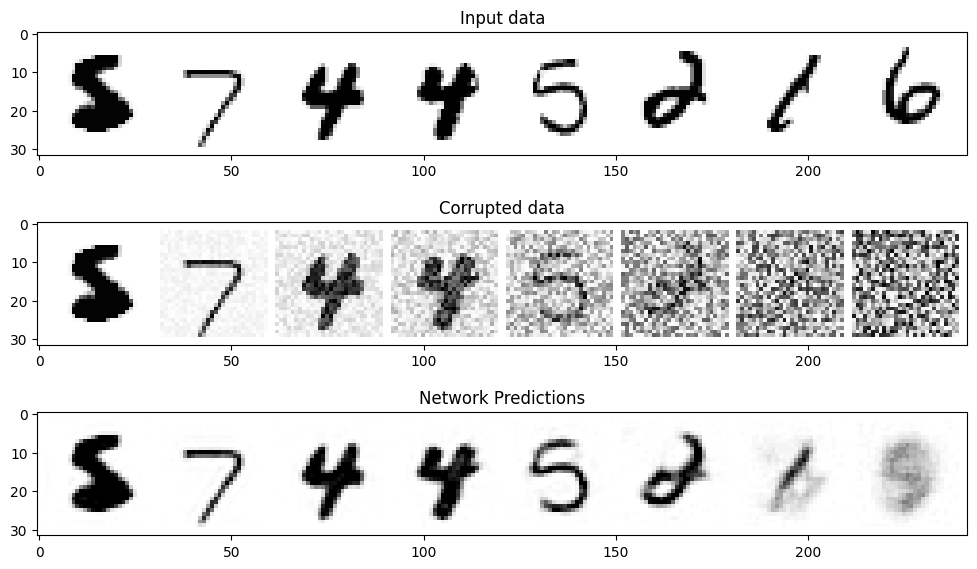

In [12]:
#@markdown Visualizing model predictions on noisy inputs:

# Fetch some data
x, y = next(iter(train_dataloader))
x = x[:8] # Only using the first 8 for easy plotting

# Corrupt with a range of amounts
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Get the model predictions
with torch.no_grad():
  preds = net(noised_x.to(device)).detach().cpu()

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 7))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0].clip(0, 1), cmap='Greys')
axs[1].set_title('Corrupted data')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0].clip(0, 1), cmap='Greys')
axs[2].set_title('Network Predictions')
axs[2].imshow(torchvision.utils.make_grid(preds)[0].clip(0, 1), cmap='Greys');

You can see that for the lower amounts the predictions are pretty good! But as the level gets very high there is less for the model to work with, and by the time we get to amount=1 it outputs a blurry mess close to the mean of the dataset to try and hedge its bets on what the output might look like...

## Sampling

If our predictions at high noise levels aren't very good, how do we generate images?

Well, what if we start from random noise, look at the model predictions but then only move a small amount towards that prediction - say, 20% of the way there. Now we have a very noisy image in which there is perhaps a hint of structure, which we can feed into the model to get a new prediction. The hope is that this new prediction is slightly better than the first one (since our starting point is slightly less noisy) and so we can take another small step with this new, better prediction.

Repeat a few times and (if all goes well) we get an image out! Here is that process illustrated over just 5 steps, visualizing the model input (left) and the predicted denoised images (right) at each stage. Note that even though the model predicts the denoised image even at step 1, we only move x part of the way there. Over a few steps the structures appear and are refined, until we get our final outputs.

## Code Explaination

This code snippet demonstrates a sampling strategy for denoising images using the trained model (`net`). Here's a breakdown:

1. **Initialization**:
   - **`n_steps = 5`**: Specifies the number of steps for the denoising process.
   - **`x = torch.rand(8, 1, 28, 28).to(device)`**: Initializes `x` with random noise as the starting point for denoising. This tensor is moved to the specified device (CPU or GPU).

2. **Initialization of History Lists**:
   - **`step_history = [x.detach().cpu()]`**: Initializes a list to store the denoising steps. The initial noisy image (`x`) is detached from the computation graph and moved to the CPU before storing.
   - **`pred_output_history = []`**: Initializes an empty list to store the model predictions at each step.

3. **Iterative Denoising**:
   - **Looping over `n_steps`**:
     - **`pred = net(x)`**: Uses the model (`net`) to predict the denoised image based on the current noisy input (`x`).
     - **`pred_output_history.append(pred.detach().cpu())`**: Appends the model prediction to the `pred_output_history` list.
     - **Calculating Mix Factor**:
       - **`mix_factor = 1/(n_steps - i)`**: Determines how much to move towards the prediction at the current step. This ensures that the process gradually converges towards the final denoised image.
     - **Updating `x`**:
       - **`x = x*(1-mix_factor) + pred*mix_factor`**: Updates `x` by blending the current input with the model prediction based on the calculated mix factor.
     - **Storing Step**:
       - **`step_history.append(x.detach().cpu())`**: Appends the updated `x` to the `step_history` list for visualization.

4. **Visualization**:
   - **Creating Subplots**:
     - **`fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)`**: Creates subplots to visualize the denoising process. Each row represents a denoising step, with two columns for displaying the noisy input (`x`) and the model prediction.
   - **Plotting**:
     - **Looping over `n_steps`**:
       - **`axs[i, 0].imshow(...)`**: Displays the noisy input image (`x`) at each step in the left column of the subplot grid.
       - **`axs[i, 1].imshow(...)`**: Displays the corresponding model prediction at each step in the right column of the subplot grid.
       - **`.clip(0, 1)`**: Clips the pixel values to ensure valid image visualization.
       - **`cmap='Greys'`**: Specifies the colormap for grayscale visualization.

### Summary:
This code snippet demonstrates a progressive denoising strategy where the model gradually refines a noisy input image over multiple steps. It visualizes each step of the denoising process, showing the noisy input and the corresponding model prediction. Gradually blending towards the prediction helps to iteratively improve the denoised output.

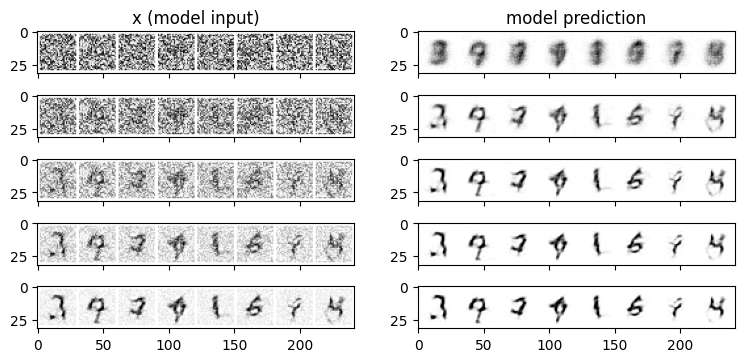

In [13]:
#@markdown Sampling strategy: Break the process into 5 steps and move 1/5'th of the way there each time:
n_steps = 5
x = torch.rand(8, 1, 28, 28).to(device) # Start from random
step_history = [x.detach().cpu()]
pred_output_history = []

for i in range(n_steps):
    with torch.no_grad(): # No need to track gradients during inference
        pred = net(x) # Predict the denoised x0
    pred_output_history.append(pred.detach().cpu()) # Store model output for plotting
    mix_factor = 1/(n_steps - i) # How much we move towards the prediction
    x = x*(1-mix_factor) + pred*mix_factor # Move part of the way there
    step_history.append(x.detach().cpu()) # Store step for plotting

fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)
axs[0,0].set_title('x (model input)')
axs[0,1].set_title('model prediction')
for i in range(n_steps):
    axs[i, 0].imshow(torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap='Greys')
    axs[i, 1].imshow(torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1), cmap='Greys')

## Code Explaination

This code snippet generates a visualization of denoising results using a more extensive sampling strategy with 40 sampling steps. Here's how it works:

1. **Initialization**:
   - **`n_steps = 40`**: Specifies the number of denoising steps to perform.
   - **`x = torch.rand(64, 1, 28, 28).to(device)`**: Initializes `x` with random noise. Here, `64` represents the batch size. This tensor is moved to the specified device (CPU or GPU).

2. **Iterative Denoising**:
   - **Looping over `n_steps`**:
     - **`noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps))`**: Generates a decreasing noise amount for each step. Initially, the noise amount is high and gradually decreases as `i` increases.
     - **`pred = net(x)`**: Uses the model (`net`) to predict the denoised image based on the current input (`x`).
     - **Calculating Mix Factor**:
       - **`mix_factor = 1/(n_steps - i)`**: Determines how much to move towards the prediction at the current step. Similar to the previous example, this ensures gradual convergence towards the final denoised image.
     - **Updating `x`**:
       - **`x = x*(1-mix_factor) + pred*mix_factor`**: Updates `x` by blending the current input with the model prediction based on the calculated mix factor.

3. **Visualization**:
   - **Creating Subplot**:
     - **`fig, ax = plt.subplots(1, 1, figsize=(12, 12))`**: Creates a single subplot to display the final denoised image.
   - **Plotting**:
     - **`ax.imshow(...)`**: Displays the final denoised image (`x`) in the subplot. The `nrow=8` argument ensures that the images are displayed in a grid of 8 rows. The pixel values are clipped to ensure valid visualization.
     - **`cmap='Greys'`**: Specifies the colormap for grayscale visualization.

### Summary:
This code snippet demonstrates a more extensive denoising process with 40 sampling steps. It iteratively refines a noisy input image using the trained model and visualizes the final denoised result. The noise amount gradually decreases over the sampling steps, leading to improved denoising performance.

We can split the process up into more steps, and hope for better images that way:

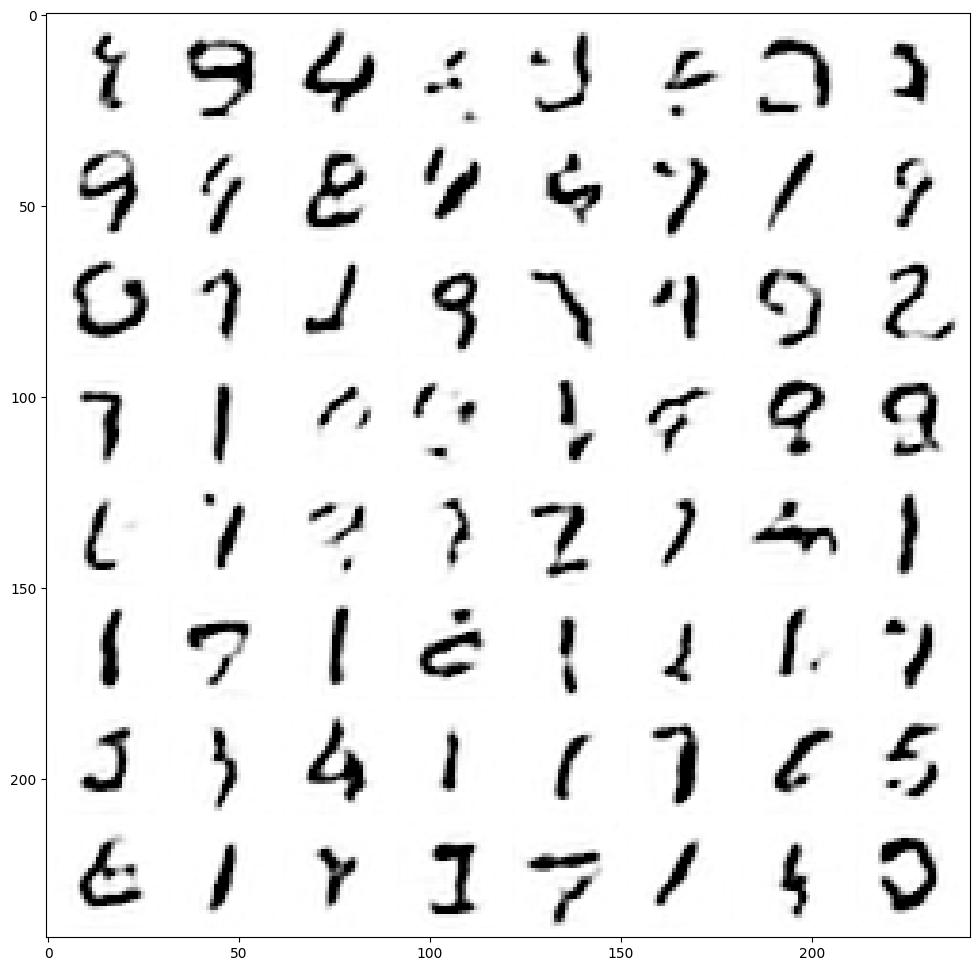

In [14]:
#@markdown Showing more results, using 40 sampling steps
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
  with torch.no_grad():
    pred = net(x)
  mix_factor = 1/(n_steps - i)
  x = x*(1-mix_factor) + pred*mix_factor
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')

Not great, but there are some recognizable digits there! You can experiment with training for longer (say, 10 or 20 epochs) and tweaking model config, learning rate, optimizer and so on. Also, don't forget that fashionMNIST is a one-line replacement if you want a slightly harder dataset to try.

## Comparison To DDPM

In this section we'll take a look at how our toy implementation differs from the approach used in the other notebook ([Introduction to Diffusers](https://github.com/huggingface/diffusion-models-class/blob/main/unit1/01_introduction_to_diffusers.ipynb)), which is based on the DDPM paper.

We'll see that


*   The diffusers `UNet2DModel` is a bit more advanced than our BasicUNet
*   The corruption process in handled differently
*   The training objective is different, involving predicting the noise rather than the denoised image
*   The model is conditioned on the amount of noise present via timestep conditioning, where t is passed as an additional argument to the forward method.
*   There are a number of different sampling strategies available, which should work better than our simplistic version above.

There have been a number of improvements suggested since the DDPM paper came out, but this example is hopefully instructive as to the different available design decisions. Once you've read through this, you may enjoy diving into the paper ['Elucidating the Design Space of Diffusion-Based Generative Models'](https://arxiv.org/abs/2206.00364) which explores all of these components in some detail and makes new recommendations for how to get the best performance. 

If all of this is too technical or intimidating, don't worry! Feel free to skip the rest of this notebook or save it for a rainy day. 




### The UNet

The diffusers UNet2DModel model has a number of improvements over our basic UNet above:

*   GroupNorm applies group normalization to the inputs of each block
*   Dropout layers for smoother training
*   Multiple resnet layers per block (if layers_per_block isn't set to 1)
*   Attention (usually used only at lower resolution blocks)
*   Conditioning on the timestep. 
*   Downsampling and upsampling blocks with learnable parameters

Let's create and inspect a UNet2DModel.

## Code Explaination

This code snippet defines a UNet model using the `UNet2DModel` class with specific configurations. Here's a breakdown of the provided parameters and their meanings:

- **`sample_size=28`**: Specifies the target image resolution. In this case, the images are expected to have a size of 28x28 pixels.
  
- **`in_channels=1`**: Indicates the number of input channels. Since it's set to 1, it suggests that the model expects grayscale images as input.

- **`out_channels=1`**: Specifies the number of output channels. Similarly, set to 1 implies that the model is designed to produce grayscale output images.

- **`layers_per_block=2`**: Determines how many ResNet layers to use per UNet block. Each UNet block consists of several ResNet layers.

- **`block_out_channels=(32, 64, 64)`**: Defines the number of output channels for each UNet block. In this case, it specifies that the first block will have 32 output channels, and subsequent blocks will have 64 output channels.

- **`down_block_types`**: Specifies the types of blocks used for downsampling in the UNet architecture. It's a tuple containing block types for each downsample operation. In this example, the first and second downsampling blocks are regular ResNet downsampling blocks (`DownBlock2D`), and the third one includes spatial self-attention (`AttnDownBlock2D`).

- **`up_block_types`**: Similar to `down_block_types`, it defines the types of blocks used for upsampling in the UNet architecture. Here, the first and second upsampling blocks include spatial self-attention (`AttnUpBlock2D`), and the third one is a regular ResNet upsampling block (`UpBlock2D`).

Overall, this configuration describes a UNet model tailored for processing grayscale images with a resolution of 28x28 pixels. The model architecture incorporates ResNet layers for feature extraction and combines them with UNet-like skip connections for efficient information propagation. The inclusion of spatial self-attention blocks suggests that the model can leverage spatial relationships within the image during both downsampling and upsampling operations.



In [15]:
model = UNet2DModel(
    sample_size=28,           # the target image resolution
    in_channels=1,            # the number of input channels, 3 for RGB images
    out_channels=1,           # the number of output channels
    layers_per_block=2,       # how many ResNet layers to use per UNet block
    block_out_channels=(32, 64, 64), # Roughly matching our basic unet example
    down_block_types=( 
        "DownBlock2D",        # a regular ResNet downsampling block
        "AttnDownBlock2D",    # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ), 
    up_block_types=(
        "AttnUpBlock2D", 
        "AttnUpBlock2D",      # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",          # a regular ResNet upsampling block
      ),
)
print(model)

UNet2DModel(
  (conv_in): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=32, out_features=128, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=128, out_features=128, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 32, eps=1e-05, affine=True)
          (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=128, out_features=32, bias=True)
          (norm2): GroupNorm(32, 32, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
        (1): ResnetBlock2D(
          (norm1): GroupNorm(32, 32, eps=1e-05, affine=True)
          (conv1): Con

As you can see, a little more going on! It also has significantly more parameters than our BasicUNet.

## Code Explaination

This code calculates the total number of parameters in the `model` by summing the number of elements in each parameter tensor. Let's break down the code step by step:

- `[p.numel() for p in model.parameters()]`: This list comprehension iterates over all parameters in the `model` and calculates the number of elements in each parameter tensor using the `numel()` method. Each parameter tensor represents a learnable parameter (e.g., weights and biases) in the neural network.

- `sum(...)`: The `sum()` function is then applied to the list of parameter sizes to calculate the total number of parameters in the model.

The result of this computation provides the total number of parameters in the `model`, which gives an indication of the model's complexity and capacity. In this case, it's being compared to the ~309k parameters of the `BasicUNet` model to illustrate the difference in parameter count between the two models.

In [16]:
sum([p.numel() for p in model.parameters()]) # 1.7M vs the ~309k parameters of the BasicUNet

1707009

We can replicate the training shown above using this model in place of our original one. We need to pass both x and timestep to the model (here I always pass t=0 to show that it works without this timestep conditioning and to keep the sampling code easy, but you can also try feeding in `(amount*1000)` to get a timestep equivalent from the corruption amount). Lines changed are shown with `#<<<` if you want to inspect the code.

## Code Explaination:

This code block trains a neural network model called `UNet2DModel` using the MNIST dataset. Here's a breakdown of what it does:

1. **Dataloader Initialization**: Initializes a DataLoader named `train_dataloader` to load batches of data from the MNIST dataset for training.

2. **Model Configuration**: Creates an instance of the `UNet2DModel` with specific configurations:
   - `sample_size`: The target image resolution (28x28 for MNIST).
   - `in_channels`: The number of input channels (1 for grayscale images).
   - `out_channels`: The number of output channels (1 for grayscale images).
   - `layers_per_block`: Specifies how many ResNet layers to use per UNet block.
   - `block_out_channels`: Specifies the number of output channels for each block.
   - `down_block_types`: Specifies the types of downsampling blocks used in the UNet.
   - `up_block_types`: Specifies the types of upsampling blocks used in the UNet.

3. **Model Training**:
   - Defines the loss function as Mean Squared Error (MSE).
   - Initializes the Adam optimizer with a learning rate of 1e-3.
   - Conducts the training loop for a specified number of epochs (`n_epochs`):
     - Iterates through batches of data from the `train_dataloader`.
     - Corrupts the input data with random noise.
     - Passes the noisy input through the model to obtain predictions.
     - Computes the loss between the predictions and the clean input data.
     - Backpropagates the gradients and updates the model parameters.
     - Records the loss for visualization.
     - Prints the average loss for each epoch.

4. **Loss and Sample Visualization**: 
   - Plots the loss values over time.
   - Generates samples from the trained model and displays them as images.

The `UNet2DModel` is a variant of the UNet architecture designed for image denoising tasks. The code demonstrates how to train this model for denoising MNIST images corrupted with random noise.

  0%|          | 0/469 [00:00<?, ?it/s]

Finished epoch 0. Average loss for this epoch: 0.019468


  0%|          | 0/469 [00:00<?, ?it/s]

Finished epoch 1. Average loss for this epoch: 0.012920


  0%|          | 0/469 [00:00<?, ?it/s]

Finished epoch 2. Average loss for this epoch: 0.011764


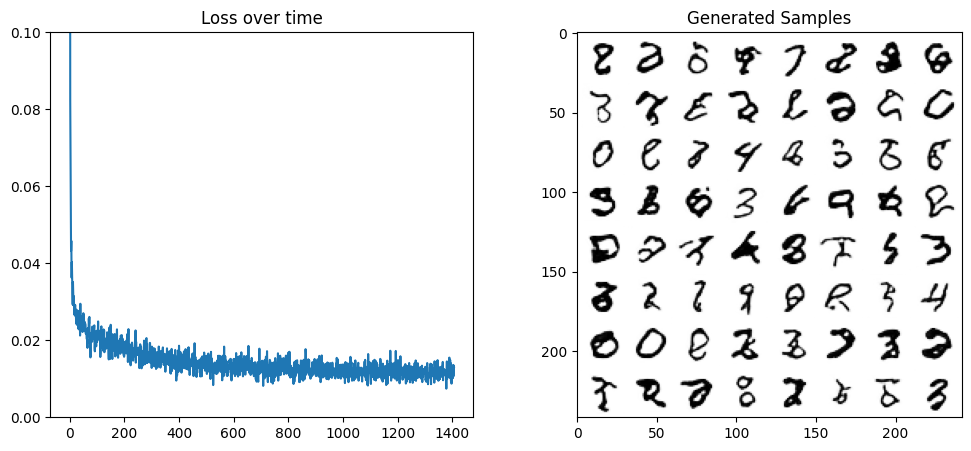

In [17]:
from tqdm.notebook import tqdm
#@markdown Trying UNet2DModel instead of BasicUNet:

# Dataloader (you can mess with batch size)
batch_size = 128
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# How many runs through the data should we do?
n_epochs = 3

# Create the network
net = UNet2DModel(
    sample_size=28,  # the target image resolution
    in_channels=1,  # the number of input channels, 3 for RGB images
    out_channels=1,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(32, 64, 64),  # Roughly matching our basic unet example
    down_block_types=( 
        "DownBlock2D",  # a regular ResNet downsampling block
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ), 
    up_block_types=(
        "AttnUpBlock2D", 
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",   # a regular ResNet upsampling block
      ),
) #<<<
net.to(device)

# Our loss finction
loss_fn = nn.MSELoss()

# The optimizer
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 

# Keeping a record of the losses for later viewing
losses = []

# The training loop
for epoch in range(n_epochs):

    for x, y in tqdm(train_dataloader):

        # Get some data and prepare the corrupted version
        x = x.to(device) # Data on the GPU
        noise_amount = torch.rand(x.shape[0]).to(device) # Pick random noise amounts
        noisy_x = corrupt(x, noise_amount) # Create our noisy x

        # Get the model prediction
        pred = net(noisy_x, 0).sample #<<< Using timestep 0 always, adding .sample

        # Calculate the loss
        loss = loss_fn(pred, x) # How close is the output to the true 'clean' x?

        # Backprop and update the params:
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)
    print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

# Plot losses and some samples
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Losses
axs[0].plot(losses)
axs[0].set_ylim(0, 0.1)
axs[0].set_title('Loss over time')

# Samples
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
  with torch.no_grad():
    pred = net(x, 0).sample
  mix_factor = 1/(n_steps - i)
  x = x*(1-mix_factor) + pred*mix_factor

axs[1].imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')
axs[1].set_title('Generated Samples');

This looks quite a bit better than our first set of results! You can explore tweaking the unet configuration or training for longer to get even better performance. 

### The Corruption Process

The DDPM paper describes a corruption process that adds a small amount of noise for every 'timestep'. Given $x_{t-1}$ for some timestep, we can get the next (slightly more noisy) version $x_t$ with:<br><br>

$q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I}) \quad
q(\mathbf{x}_{1:T} \vert \mathbf{x}_0) = \prod^T_{t=1} q(\mathbf{x}_t \vert \mathbf{x}_{t-1})$<br><br>


That is, we take $x_{t-1}$, scale it by $\sqrt{1 - \beta_t}$ and add noise scaled by $\beta_t$. This $\beta$ is defined for every t according to some schedule, and determines how much noise is added per timestep. Now, we don't necessarily want to do this operation 500 times to get $x_{500}$ so we have another formula to get $x_t$ for any t given $x_0$: <br><br>

$\begin{aligned}
q(\mathbf{x}_t \vert \mathbf{x}_0) &= \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, \sqrt{(1 - \bar{\alpha}_t)} \mathbf{I})
\end{aligned}$ where $\bar{\alpha}_t = \prod_{i=1}^T \alpha_i$ and $\alpha_i = 1-\beta_i$<br><br>

The maths notation always looks scary! Luckily the scheduler handles all that for us (uncomment the next cell to check out the code). We can plot $\sqrt{\bar{\alpha}_t}$ (labelled as `sqrt_alpha_prod`) and $\sqrt{(1 - \bar{\alpha}_t)}$ (labelled as `sqrt_one_minus_alpha_prod`) to view how the input (x) and the noise are scaled and mixed across different timesteps.

## Code Explaination

This code snippet visualizes the evolution of two noise parameters over training timesteps using the `DDPMScheduler` from the `diffusers` package. Here's what it does:

1. **Initialization**: Initializes a `DDPMScheduler` object named `noise_scheduler`. The parameter `num_train_timesteps` specifies the number of training timesteps.

2. **Plotting**: 
   - Plots the square root of the cumulative product of noise scaling factors (denoted as  $ \sqrt{\bar{\alpha}_t} $ on the y-axis.
   - Plots the square root of the cumulative product of inverse noise scaling factors (denoted as \( \sqrt{(1 - \bar{\alpha}_t)} \)) on the y-axis.
   - Labels the two lines accordingly.
   - Adds a legend with a large font size ("x-large") to distinguish between the two lines.

This visualization provides insight into how the noise scaling factors evolve over training timesteps. The `DDPMScheduler` dynamically adjusts the level of noise during training, and plotting these parameters helps understand how the noise changes during the training process.


In [18]:
#??noise_scheduler.add_noise

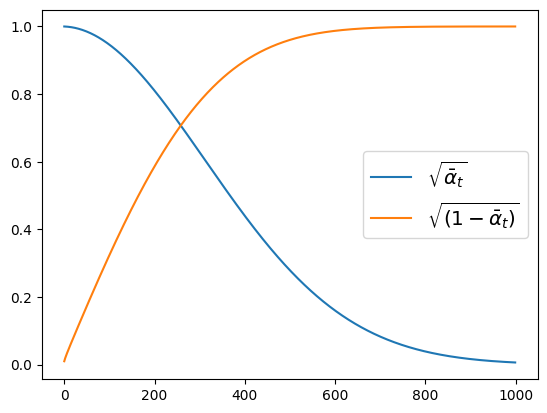

In [19]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

Initially, the noisy x is mostly x (sqrt_alpha_prod ~= 1) but over time the contribution of x drops and the noise component increases. Unlike our linear mix of x and noise according to `amount`, this one gets noisy relatively quickly. We can visualize this on some data.

## Code Explaination

This code snippet visualizes the effect of adding noise to a batch of images using the DDPM (Diffusion Probabilistic Models) noising process. Here's what it does:

1. **Initialization**: Sets up a matplotlib figure with three subplots.

2. **Batch Processing**:
   - Fetches a batch of images (`xb`) and their labels (`yb`) from the `train_dataloader`.
   - Converts the pixel values of the images to the range (-1, 1) by multiplying by 2 and subtracting 1.
   - Displays the clean input images in the first subplot.

3. **Noising Process**:
   - Generates random noise (`noise`) of the same shape as the input images.
   - Defines a sequence of timesteps (`timesteps`) using `torch.linspace()` to specify different points in the training process.
   - Applies the DDPM noising process to the input images using the `add_noise` method of the `noise_scheduler` object. This method takes the clean images, the generated noise, and the timesteps as input.
   - Displays the resulting noisy images in the second and third subplots. The second subplot clips the pixel values to the range (-1, 1), while the third subplot shows the noisy images without clipping.

By visualizing the clean and noisy versions of the input images, this code snippet helps understand how the DDPM noising process affects the appearance of images over different timesteps during training.

X shape torch.Size([8, 1, 28, 28])
Noisy X shape torch.Size([8, 1, 28, 28])


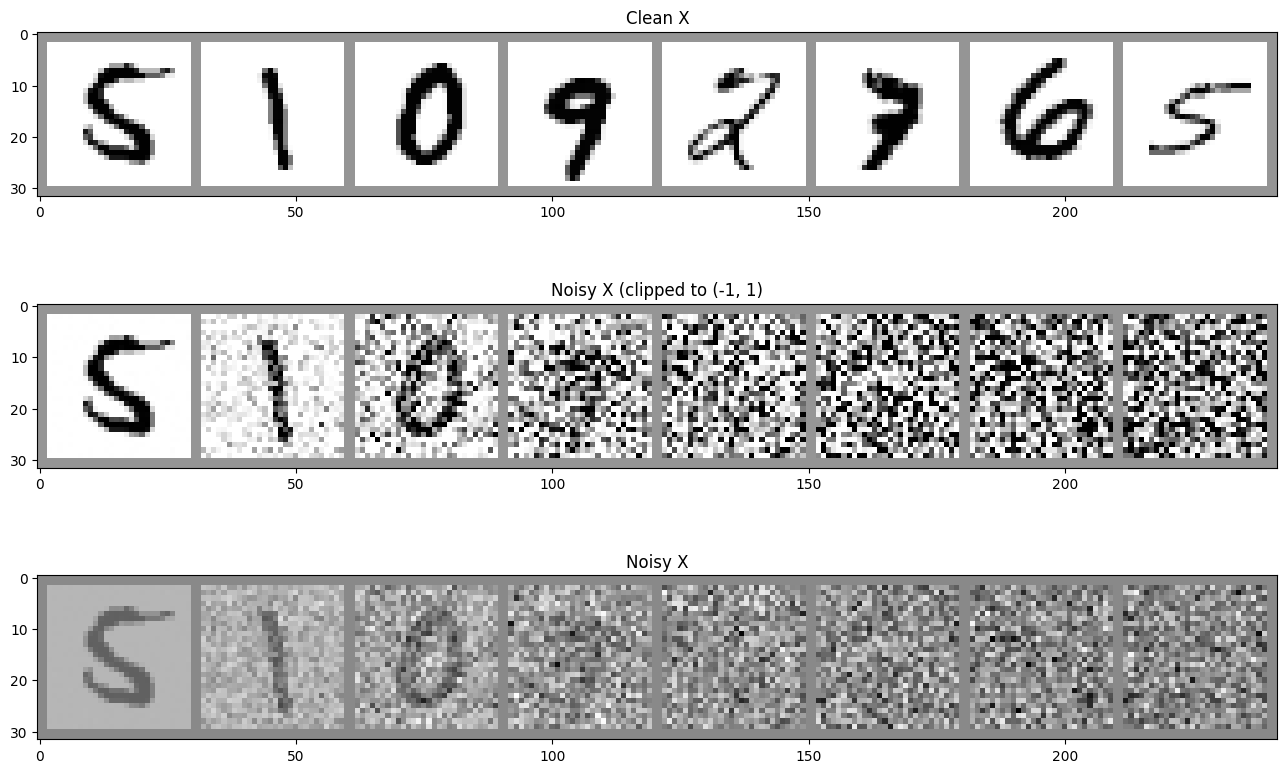

In [20]:
#@markdown visualize the DDPM noising process for different timesteps:

# Noise a batch of images to view the effect
fig, axs = plt.subplots(3, 1, figsize=(16, 10))
xb, yb = next(iter(train_dataloader))
xb = xb.to(device)[:8]
xb = xb * 2. - 1. # Map to (-1, 1)
print('X shape', xb.shape)

# Show clean inputs
axs[0].imshow(torchvision.utils.make_grid(xb[:8])[0].detach().cpu(), cmap='Greys')
axs[0].set_title('Clean X')

# Add noise with scheduler
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb) # << NB: randn not rand
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print('Noisy X shape', noisy_xb.shape)

# Show noisy version (with and without clipping)
axs[1].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu().clip(-1, 1),  cmap='Greys')
axs[1].set_title('Noisy X (clipped to (-1, 1)')
axs[2].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu(),  cmap='Greys')
axs[2].set_title('Noisy X');

Another dynamic at play: the DDPM version adds noise drawn from a Gaussian distribution (mean 0, s.d. 1 from torch.randn) rather than the uniform noise between 0 and 1 (from torch.rand) we used in our original `corrupt` function. In general, it makes sense to normalize the training data as well. In the other notebook, you'll see `Normalize(0.5, 0.5)` in the list of transforms, which maps the image data form (0, 1) to (-1, 1) and is 'good enough' for our purposes. We didn't do that for this notebook, but the visualization cell above adds it in for more accurate scaling and visualization.

### Training Objective

In our toy example, we had the model try to predict the denoised image. In DDPM and many other diffusion model implementations, the model predicts the noise used in the corruption process (before scaling, so unit variance noise). In code, it looks something like:

```python
noise = torch.randn_like(xb) # << NB: randn not rand
noisy_x = noise_scheduler.add_noise(x, noise, timesteps)
model_prediction = model(noisy_x, timesteps).sample
loss = mse_loss(model_prediction, noise) # noise as the target
```

You may think that predicting the noise (from which we can derive what the denoised image looks like) is equivalent to just predicting the denoised image directly. So why favour one over the other - is it just for mathematical convenience?

It turns out there's another subtlety here. We compute the loss across different (randomly chosen) timesteps during training. These different objectives will lead to different 'implicit weighting' of these losses, where predicting the noise puts more weight on lower noise levels. You can pick more complex objectives to change this 'implicit loss weighting'. Or perhaps you choose a noise schedule that will result in more examples at a higher noise level. Perhaps you have the model predict a 'velocity' v which we define as being a combination of both the image and the noise dependent on the noise level (see 'PROGRESSIVE DISTILLATION FOR FAST SAMPLING OF DIFFUSION MODELS'). Perhaps you have the model predict the noise but then scale the loss by some factor dependent on the amount of noise based on a bit of theory (see 'Perception Prioritized Training of Diffusion Models') or based on experiments trying to see what noise levels are most informative to the model (see 'Elucidating the Design Space of Diffusion-Based Generative Models'). TL;DR: choosing the objective has an effect on model performance, and research in ongoing into what the 'best' option is.

At the moment, predicting the noise (epsilon or eps you'll see in some places) is the favoured approach but over time we will likely see other objectives supported in the library and used in different situations. 



### Timestep Conditioning

The UNet2DModel takes in both x and timestep. The latter is turned into an embedding and fed into the model in a number of places. 

The theory behind this is that by giving the model information about what the noise level is, it can better perform its task. While it is possible to train a model without this timestep conditioning, it does seem to help performance in some cases and most implementations include it, at least in the current literature. 

### Sampling

Given a model that estimates the noise present in a noisy input (or predicts the denoised version), how do we produce new images?

We could feed in pure noise, and hope that the model predicts a good image as the denoised version in one step. However, as we saw in the experiments above, this doesn't usually work well. So, instead, we take a number of smaller steps based on the model prediction, iteratively removing a little bit of the noise at a time.

Exactly how we take these steps depends on the sampling method used. We won't go into the theory too deeply, but some key design questions are:
- How large of a step should you take? In other words, what 'noise schedule' should you follow?
- Do you use only the model's current prediction to inform the update step (like DDPM, DDIM and many others)? Do you evaluate the model several times to estimate higher-order gradients for a larger, more accurate step (higher-order methods and some discrete ODE solvers)? Or do you keep a history of past predictions to try and better inform the current update step (linear multi-step and ancestral samplers)? 
- Do you add in additional noise (sometimes called churn) to add more stochasticity (randomness) to the sampling process, or do you keep it completely deterministic? Many samplers control this with a parameter (such as 'eta' for DDIM samplers) so that the user can choose.

Research on sampling methods for diffusion models is rapidly evolving, and more and more methods for finding good solutions in fewer steps are being proposed. The brave and curious might find it interesting to browse through the code of the different implementations available in the diffusers library [here](https://github.com/huggingface/diffusers/tree/main/src/diffusers/schedulers) or check out the [docs](https://huggingface.co/docs/diffusers/api/schedulers/overview) which often link to the relevant papers.

## Conclusions

Hopefully this has been a helpful way to look at diffusion models from a slightly different angle. 

This notebook was written for this Hugging Face course by Jonathan Whitaker, and overlaps with a [version included in his own course](https://johnowhitaker.github.io/tglcourse/dm1.html), 'The Generative Landscape'. Check that out if you'd like to see this basic example extended with noise and class conditioning. Questions or bugs can be communicated through GitHub issues or via Discord. You are also welcome to reach out via Twitter [@johnowhitaker](https://twitter.com/johnowhitaker).